# Критерий согласия Пирсона ( $\chi^2$)

In [83]:
import numpy as np
import pandas as pd

from scipy import stats

In [84]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Исчерпанная рождаемость

Исчерпанная рождаемость — количество детей, родившихся у женщины на момент окончания конвенционального репродуктивного возраста (45 лет). Для 1878 женщин старше 45, участвовавших в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак — типичный счётчик, а, значит, его можно попробовать описать распределением Пуассона.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество детей у опрашиваемой женщины
* **гипотеза $H_0$** - рассматриваемая величина имеет распределение Пуассона

In [85]:
fin = open('fertility.txt', 'r')
data = map(lambda x: int(x.strip()), fin.readlines())

In [86]:
data[:20]

[0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4]

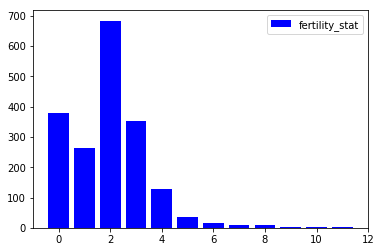

In [87]:
pylab.bar(range(12), np.bincount(data), color = 'b', label = 'fertility_stat')
pylab.legend()

In [88]:
l = np.mean(data)
l

1.93716719914803

## Критерий согласия

In [89]:
observed_frequences = np.bincount(data)
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

In [90]:
expected_frequences = [len(data)*stats.poisson.pmf(x, l) for x in range(min(data), max(data) + 1)]
expected_frequences

[270.6416065637888,
 524.2780429600978,
 507.80711402791167,
 327.9024282629646,
 158.80045713800124,
 61.52460735548975,
 19.863908551586047,
 5.49710172757265,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

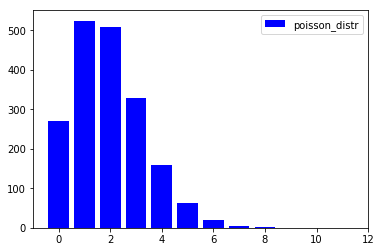

In [91]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [92]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=431.5752205284916, pvalue=1.772613180233512e-86)

In [97]:
fin = open('pines.txt', 'r')
fin.readline()
data = map(lambda x: tuple(x.strip().split('\t')), fin.readlines())
data = np.array(map(lambda x: (float(x[0])/40, float(x[1])/40), data), dtype = int )
data[data == 5] = 4
data = data[:, 0] + (data[:, 1] * 5)

pine_sum = np.array([(data == i).sum() for i in range(25)]).reshape((5, 5))
print pine_sum


[[18 14 12  8  7]
 [26 12 24 19  8]
 [29 22 15 31 37]
 [25 34 50 50 27]
 [20 25 37  7 27]]


In [94]:
from scipy.stats import binned_statistic_2d
binned_statistic_2d()

TypeError: binned_statistic_2d() takes at least 3 arguments (0 given)

In [98]:
pine_sum.sum()

584

In [ ]:
583. / 25

In [99]:
observed_frequences = pine_sum.reshape((-1))
expected_frequences = np.array([23.36] * 25)
print expected_frequences

[23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36
 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36 23.36
 23.36]


In [102]:
stats.chisquare(observed_frequences, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)